# **AI SATURDAY LAGOS COHORT 9-FLIPPED**  
## *Predicting Solar Energy Efficiency Levels of Buildings in Lagos*  

**BY TEAM NWAPA**  
*October, 2025*

## Abstract

This project focuses on predicting the solar energy efficiency levels of buildings in Lagos using data-driven classification techniques. The goal is to develop a reliable model capable of categorizing buildings based on their energy performance indicators. The dataset underwent thorough preprocessing, including handling of missing values, feature selection, and normalization to ensure data quality and consistency. A Random Forest Classifier was implemented to capture nonlinear relationships between the building features and their efficiency categories. The model was evaluated using performance metrics such as accuracy, precision, recall, and F1-score to ensure robustness. After achieving satisfactory results, the model was deployed using Gradio to allow easy interaction and accessibility through a web interface.

## Introduction

Lagos, Nigeria’s largest and most industrialized city, continues to face major energy supply challenges despite its growing population and economic activity. With over 20 million residents and an unreliable power grid, the demand for clean and sustainable energy sources has become increasingly urgent. Given its tropical climate and average solar irradiation of about 5.5 kWh/m² per day, Lagos has immense potential for solar energy generation, particularly through rooftop installations on residential and commercial buildings.

However, the efficiency of solar systems varies across buildings due to differences in rooftop area, angle, shading, and structural characteristics. Understanding these variations is essential for effective solar planning and deployment. This project applies data science and machine learning techniques to predict the solar energy efficiency levels of buildings in Lagos, providing insights that can guide renewable energy adoption and sustainable urban energy development.

## Problem Statement

Despite Lagos’ high solar potential, the actual utilization of rooftop solar energy remains low. One major challenge is the lack of data-driven insight into which buildings are most suitable for efficient solar energy generation. Many installations are done without proper evaluation of key structural and environmental factors such as roof area, tilt, height, and shading; leading to suboptimal performance and wasted investment.

This project addresses this challenge by developing a classification model capable of predicting the solar energy efficiency levels of buildings in Lagos using geospatial rooftop data. The goal is to identify patterns and attributes that influence solar performance, enabling better decision-making for energy planners, investors, and building owners in promoting sustainable energy adoption.

## Materials and Methods

The dataset used in this project was obtained from EnergyData.info and titled “Lagos State – Rooftop Solar Potential Mapping”, compiled by NEO. It provides detailed, building-level information across Lagos, derived from high-resolution satellite imagery. Each record contains attributes such as rooftop area, suitable area for installation, roof angle, building height, installable capacity, and estimated yearly solar energy potential. These features represent the physical and environmental conditions that determine how efficiently a rooftop can generate solar power.

The analytical process began with extensive data cleaning and preparation to make the dataset suitable for machine learning tasks. Missing values were handled appropriately, column names were simplified, and irrelevant or highly correlated features were removed to improve model performance. Additional transformations such as feature scaling and categorization of energy efficiency levels were carried out to prepare the data for classification. The final dataset was then analyzed using Python libraries such as Pandas, NumPy, and scikit-learn, leading to the development of a predictive model that classifies buildings based on their solar energy efficiency levels.

## Data Analysis & Modeling
This section focuses on the analytical and predictive processes carried out on the dataset. The analysis began with a detailed exploration of the data to understand its structure, identify missing values, and examine relationships between key features influencing solar energy efficiency levels in buildings across Lagos. Through data cleaning, transformation, and visualization, important insights were derived to guide the modeling stage.

Following the analysis, a classification model was developed to predict the solar energy efficiency levels of buildings based on various physical and environmental parameters. The modeling process involved splitting the data into training and testing sets, selecting suitable features, and applying machine learning techniques to evaluate model performance and predictive accuracy.

In [1]:
# Data Handling and Computation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Model Saving and Loading
import joblib

# General Settings
import warnings
warnings.filterwarnings('ignore')

# Optional: To make plots display nicely in Jupyter
%matplotlib inline

In [28]:
df = pd.read_csv("lagos_prepared_with_features.csv")
df

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Area_utilization_ratio,Energy_density,Capacity_density,System_efficiency,Energy_category
0,2c2e6093-4675-4342-8141-78b7da7319f0,Lagos,174.40,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39,0.593005,253.625508,0.193966,0.149267,Medium
1,94e9aea9-4208-4a77-8578-100648bbca1a,Lagos,627.00,463.14,89.85,118061.12,multi-family residential,6.34,5.74,1314.00,0.738660,254.914540,0.194002,0.149998,High
2,91841e20-5844-4aa5-9ba8-7c27b174ab4e,Lagos,418.81,309.52,60.05,78901.84,multi-family residential,8.41,8.75,1314.00,0.739046,254.916774,0.194010,0.149993,High
3,2818b582-c998-4c09-b473-e79de8caa898,Lagos,548.53,409.27,79.40,104328.57,multi-family residential,6.32,5.60,1314.00,0.746121,254.913798,0.194004,0.149996,High
4,32cfd9be-33f3-4761-a48a-a22077dcecc0,Lagos,485.97,359.03,69.65,89546.93,multi-family residential,17.48,5.27,1285.63,0.738790,249.413503,0.193995,0.146766,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212527,78a73b51-1a31-43b9-96b5-98c67da59229,Lagos,52.49,27.49,5.33,6188.47,single family residential,21.97,9.21,1160.22,0.523719,225.117134,0.193889,0.132542,Low
212528,7648b611-d7a9-46b2-a8d6-0c36dc6751b0,Lagos,263.48,191.27,37.11,45936.54,single family residential,19.84,8.21,1238.00,0.725937,240.165943,0.194019,0.141307,High
212529,a36ce882-f2d6-4f78-9b5e-e978f90d1fab,Lagos,205.34,131.26,25.49,31080.03,commercial,15.21,11.39,1219.30,0.639232,236.782188,0.194195,0.139190,Medium
212530,f529cf4e-1887-4d4a-9748-39016cc54bee,Lagos,300.00,225.31,43.71,53530.86,single family residential,13.85,11.34,1224.67,0.751033,237.587590,0.193999,0.139804,High


In [29]:
# Preview dataset
df.shape

(212532, 15)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212532 entries, 0 to 212531
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        212532 non-null  object 
 1   City                        212532 non-null  object 
 2   Surface_area                212532 non-null  float64
 3   Potential_installable_area  212532 non-null  float64
 4   Peak_installable_capacity   212532 non-null  float64
 5   Energy_potential_per_year   212532 non-null  float64
 6   Assumed_building_type       212532 non-null  object 
 7   Estimated_tilt              212532 non-null  float64
 8   Estimated_building_height   212532 non-null  float64
 9   Estimated_capacity_factor   212532 non-null  float64
 10  Area_utilization_ratio      212527 non-null  float64
 11  Energy_density              212267 non-null  float64
 12  Capacity_density            212267 non-null  float64
 13  System_efficie

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Surface_area,212532.0,259.294310,330.830366,0.000000,119.500000,208.290000,316.250000,3.416016e+04
Potential_installable_area,212532.0,171.201964,253.484739,0.000000,66.670000,122.640000,217.980000,2.625598e+04
Peak_installable_capacity,212532.0,33.213365,49.177934,0.000000,12.930000,23.790000,42.290000,5.093660e+03
Energy_potential_per_year,212532.0,41180.531968,62268.433292,0.000000,15987.960000,29300.820000,52103.892500,6.336512e+06
Estimated_tilt,212532.0,14.222236,5.485626,0.000000,9.970000,15.230000,18.320000,3.384000e+01
Estimated_building_height,212532.0,14.201225,8.153915,-19.420000,8.520000,11.870000,17.070000,1.005900e+02
Estimated_capacity_factor,212532.0,1236.169715,43.416158,1027.000000,1205.860000,1234.090000,1267.190000,1.344000e+03
Area_utilization_ratio,212527.0,0.610650,0.103412,0.000000,0.553588,0.610864,0.699316,8.280837e-01
Energy_density,212267.0,239.818411,8.428474,199.333333,233.925161,239.418981,245.839749,2.610550e+02
Capacity_density,212267.0,0.194001,0.000115,0.191257,0.193974,0.194000,0.194027,1.967213e-01


In [32]:
df.isnull().sum()

uuid                            0
City                            0
Surface_area                    0
Potential_installable_area      0
Peak_installable_capacity       0
Energy_potential_per_year       0
Assumed_building_type           0
Estimated_tilt                  0
Estimated_building_height       0
Estimated_capacity_factor       0
Area_utilization_ratio          5
Energy_density                265
Capacity_density              265
System_efficiency             265
Energy_category                 0
dtype: int64

In [34]:
df.dropna(subset=['Area_utilization_ratio', 'Energy_density', 'Capacity_density', 'System_efficiency'], inplace=True)

In [35]:
df.duplicated().sum()

0

In [36]:
df['Energy_category'].value_counts()

Energy_category
Medium    70844
High      70844
Low       70579
Name: count, dtype: int64

In [37]:
df

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Area_utilization_ratio,Energy_density,Capacity_density,System_efficiency,Energy_category
0,2c2e6093-4675-4342-8141-78b7da7319f0,Lagos,174.40,103.42,20.06,26229.95,single family residential,13.33,5.05,1307.39,0.593005,253.625508,0.193966,0.149267,Medium
1,94e9aea9-4208-4a77-8578-100648bbca1a,Lagos,627.00,463.14,89.85,118061.12,multi-family residential,6.34,5.74,1314.00,0.738660,254.914540,0.194002,0.149998,High
2,91841e20-5844-4aa5-9ba8-7c27b174ab4e,Lagos,418.81,309.52,60.05,78901.84,multi-family residential,8.41,8.75,1314.00,0.739046,254.916774,0.194010,0.149993,High
3,2818b582-c998-4c09-b473-e79de8caa898,Lagos,548.53,409.27,79.40,104328.57,multi-family residential,6.32,5.60,1314.00,0.746121,254.913798,0.194004,0.149996,High
4,32cfd9be-33f3-4761-a48a-a22077dcecc0,Lagos,485.97,359.03,69.65,89546.93,multi-family residential,17.48,5.27,1285.63,0.738790,249.413503,0.193995,0.146766,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212527,78a73b51-1a31-43b9-96b5-98c67da59229,Lagos,52.49,27.49,5.33,6188.47,single family residential,21.97,9.21,1160.22,0.523719,225.117134,0.193889,0.132542,Low
212528,7648b611-d7a9-46b2-a8d6-0c36dc6751b0,Lagos,263.48,191.27,37.11,45936.54,single family residential,19.84,8.21,1238.00,0.725937,240.165943,0.194019,0.141307,High
212529,a36ce882-f2d6-4f78-9b5e-e978f90d1fab,Lagos,205.34,131.26,25.49,31080.03,commercial,15.21,11.39,1219.30,0.639232,236.782188,0.194195,0.139190,Medium
212530,f529cf4e-1887-4d4a-9748-39016cc54bee,Lagos,300.00,225.31,43.71,53530.86,single family residential,13.85,11.34,1224.67,0.751033,237.587590,0.193999,0.139804,High


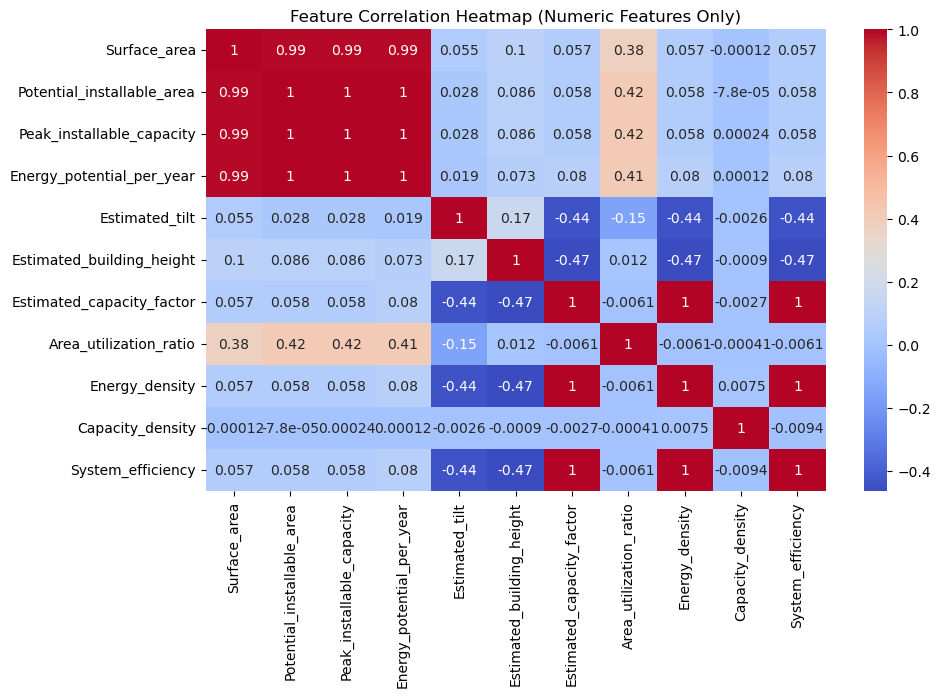

In [38]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Numeric Features Only)')
plt.show()

## Heatmap and Multicollinearity Insights:

The correlation heatmap reveals significant multicollinearity among several features in the dataset. In particular, Surface_area, Potential_installable_area, Peak_installable_capacity, and Energy_potential_per_year show extremely strong positive correlations (above 0.99). This suggests that these variables represent closely related measurements; essentially capturing the same underlying property of rooftop solar potential.

On the other hand, variables such as Energy_density, Capacity_density, and System_efficiency show much weaker correlations with others, indicating that they contribute distinct information to the model.

From the heatmap, we observed that while most features had moderate correlations, a few pairs exhibited notably strong relationships, indicating potential multicollinearity. In particular, some numerical features appeared to be mathematically related rather than representing independent measurements. This insight was confirmed earlier during exploratory analysis, where dividing one of the energy-related columns by Peak Installation Capacity drastically reduced a previously near-perfect correlation (≈0.99) to a weak relationship (≈0.08). This suggests that certain variables in the dataset are derived features rather than purely observed values. To mitigate the risk of multicollinearity and improve model interpretability, highly correlated features were dropped before modeling.

In [39]:
# Dropping column
df.drop(columns=['Surface_area',
    'Potential_installable_area',
    'Energy_potential_per_year',
    'Energy_density',
    'System_efficiency',
    'uuid',
    'City'], inplace=True)

df.head()

,Peak_installable_capacity,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Area_utilization_ratio,Capacity_density,Energy_category
0,20.06,single family residential,13.33,5.05,1307.39,0.593005,0.193966,Medium
1,89.85,multi-family residential,6.34,5.74,1314.00,0.738660,0.194002,High
2,60.05,multi-family residential,8.41,8.75,1314.00,0.739046,0.194010,High
3,79.40,multi-family residential,6.32,5.60,1314.00,0.746121,0.194004,High
4,69.65,multi-family residential,17.48,5.27,1285.63,0.738790,0.193995,High


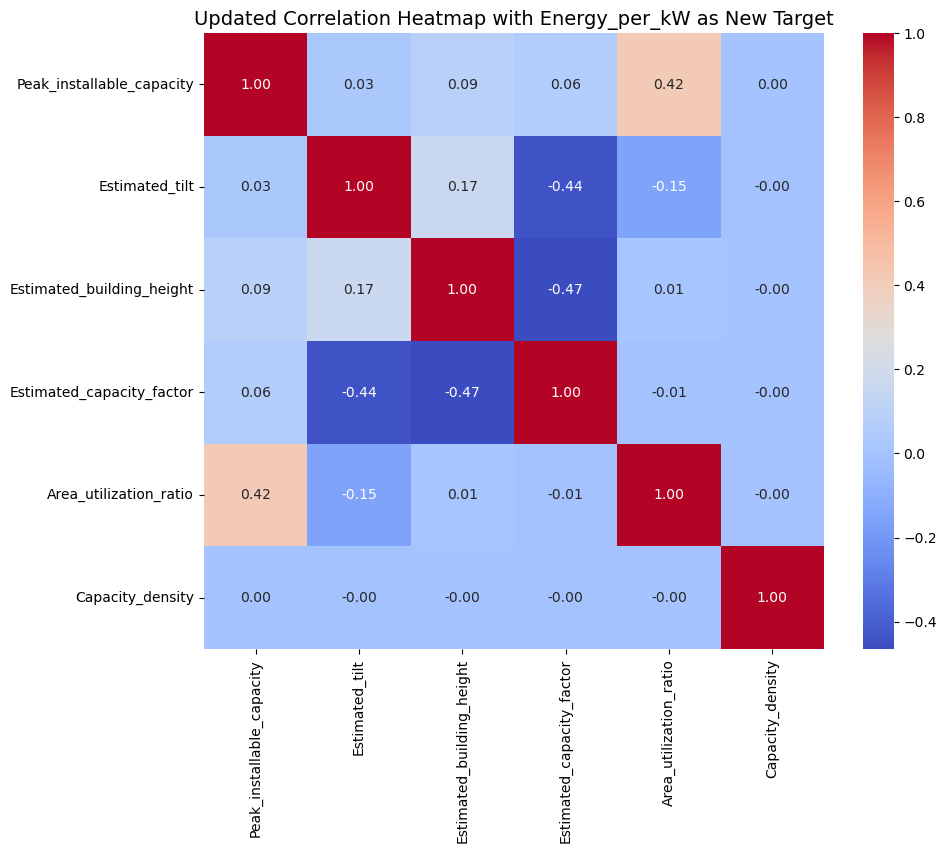

In [40]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Updated Correlation Heatmap with Energy_per_kW as New Target", fontsize=14)
plt.show()

In [41]:
df = df.drop(columns=['Peak_installable_capacity'])

In [43]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical column
df = pd.get_dummies(df, columns=['Assumed_building_type'], drop_first=True)

In [44]:
df

,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Area_utilization_ratio,Capacity_density,Energy_category,Assumed_building_type_industrial,Assumed_building_type_multi-family residential,Assumed_building_type_peri-urban settlement,Assumed_building_type_public,Assumed_building_type_single family residential
0,13.33,5.05,1307.39,0.593005,0.193966,Medium,False,False,False,False,True
1,6.34,5.74,1314.00,0.738660,0.194002,High,False,True,False,False,False
2,8.41,8.75,1314.00,0.739046,0.194010,High,False,True,False,False,False
3,6.32,5.60,1314.00,0.746121,0.194004,High,False,True,False,False,False
4,17.48,5.27,1285.63,0.738790,0.193995,High,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
212527,21.97,9.21,1160.22,0.523719,0.193889,Low,False,False,False,False,True
212528,19.84,8.21,1238.00,0.725937,0.194019,High,False,False,False,False,True
212529,15.21,11.39,1219.30,0.639232,0.194195,Medium,False,False,False,False,False
212530,13.85,11.34,1224.67,0.751033,0.193999,High,False,False,False,False,True


In [46]:
X = df.drop('Energy_category', axis=1)
y = df['Energy_category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**This code block below performs data cleaning to prepare the dataset for analysis and modeling. It removes rows with zero or negative values in key numeric features, replaces any infinite values with NaN, drops all rows containing missing values, and resets the dataframe index. After execution, the dataset is clean, complete, and ready for exploratory analysis, transformations, or model training**

In [49]:
# ----------------------------------------------------
# 1️⃣ Remove zeros or negative values from key numeric features
# ----------------------------------------------------
critical_cols = [
    'Estimated_building_height',
    'Capacity_density',
    'Energy_potential_per_year'
]

for col in critical_cols:
    if col in df.columns:
        zero_neg_count = (df[col] <= 0).sum()
        print(f"{col}: Found {zero_neg_count} zero/negative values. Removing them...")
        df = df[df[col] > 0]

print("Shape after removing invalid (≤0) entries:", df.shape)

# ----------------------------------------------------
# 2️⃣ Handle infinities (if any)
# ----------------------------------------------------
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# ----------------------------------------------------
# 3️⃣ Handle missing values — drop or fill
# ----------------------------------------------------
missing_count = df.isna().sum().sum()
print(f"Total missing values before cleanup: {missing_count}")

# Drop all rows with missing data (safer for physical/geospatial datasets)
df.dropna(inplace=True)

print("Total missing values after cleanup:", df.isna().sum().sum())
print("Shape after dropping missing entries:", df.shape)

# ----------------------------------------------------
# 4️⃣ Optional — Reset index after cleaning
# ----------------------------------------------------
df.reset_index(drop=True, inplace=True)

print("\n✅ Data cleaning complete and safe for EDA or log transformation.")
print(df.describe().T)

Estimated_building_height: Found 95 zero/negative values. Removing them...
Capacity_density: Found 0 zero/negative values. Removing them...
Shape after removing invalid (≤0) entries: (212172, 11)
Total missing values before cleanup: 0
Total missing values after cleanup: 0
Shape after dropping missing entries: (212172, 11)

✅ Data cleaning complete and safe for EDA or log transformation.
                              count         mean        std          min  \
Estimated_tilt             212172.0    14.227469   5.474125     0.000000   
Estimated_building_height  212172.0    14.208757   8.147868     0.010000   
Estimated_capacity_factor  212172.0  1236.154097  43.435953  1027.000000   
Area_utilization_ratio     212172.0     0.611442   0.101215     0.010225   
Capacity_density           212172.0     0.194001   0.000115     0.191257   

                                   25%          50%          75%          max  
Estimated_tilt                9.980000    15.230000    18.320000    32.60

## Modeling

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.85      0.86      0.85     14169
         Low       0.73      0.70      0.72     14116
      Medium       0.59      0.61      0.60     14169

    accuracy                           0.72     42454
   macro avg       0.73      0.72      0.72     42454
weighted avg       0.73      0.72      0.72     42454

[[12135   206  1828]
 [   25  9912  4179]
 [ 2098  3381  8690]]


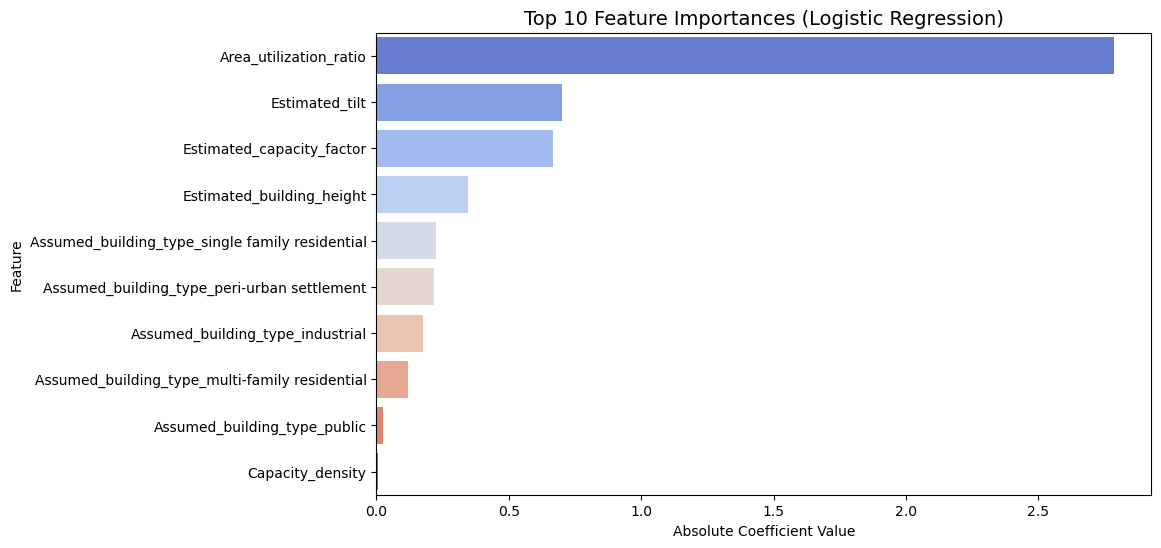

In [52]:
# Get feature importance (absolute coefficient values)
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0],
    'Abs_Coefficient': np.abs(logreg.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

# Display top features
plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance.head(10), palette='coolwarm')
plt.title('Top 10 Feature Importances (Logistic Regression)', fontsize=14)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score

# Initialize model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Cross-validation (5-fold)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")

# Train on full training data
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_rf))

Cross-validation scores: [0.78591408 0.78971233 0.7870035  0.79038337 0.78632   ]
Average CV Accuracy: 0.7879

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.89      0.88     14169
         Low       0.80      0.79      0.80     14116
      Medium       0.69      0.68      0.68     14169

    accuracy                           0.79     42454
   macro avg       0.79      0.79      0.79     42454
weighted avg       0.79      0.79      0.79     42454


Confusion Matrix:
 [[12656    95  1418]
 [   31 11183  2902]
 [ 1894  2692  9583]]

Test Accuracy: 0.7872520846092241


In [56]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.7872520846092241


## Using Regularization Parameters in Random Forest 

In [57]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,          # limit depth to control complexity
    min_samples_split=10,  # require more samples before splitting
    min_samples_leaf=4,    # require more samples per leaf
    max_features='sqrt',   # consider fewer features at each split
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Cross-validation to check stability
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("CV Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

# Evaluate on test set
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

CV Scores: [0.78735683 0.79015399 0.78832848 0.79144338 0.78867558]
Average CV Accuracy: 0.7891916504369842

Test Accuracy: 0.7890658124087248
              precision    recall  f1-score   support

        High       0.87      0.89      0.88     14169
         Low       0.81      0.79      0.80     14116
      Medium       0.68      0.70      0.69     14169

    accuracy                           0.79     42454
   macro avg       0.79      0.79      0.79     42454
weighted avg       0.79      0.79      0.79     42454



In [58]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8291
Testing Accuracy: 0.7891


To address overfitting observed in the initial model (training accuracy of 1.0), hyperparameters such as max_depth, min_samples_split, and min_samples_leaf were introduced to constrain the model’s growth. This reduced the training accuracy to 0.83 while maintaining a stable test accuracy of 0.79, indicating improved generalization and reduced overfitting.

In [59]:
# --- Import Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

# --- Initialize Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=15, min_samples_split=10,
        min_samples_leaf=4, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# --- Compare Models ---
results = []
for name, model in models.items():
    # 5-fold Cross Validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Mean CV Accuracy": cv_scores.mean(),
        "Test Accuracy": test_acc
    })

# --- Display Results ---
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test Accuracy", ascending=False))

                 Model  Mean CV Accuracy  Test Accuracy
2        Random Forest          0.789245       0.789419
3    Gradient Boosting          0.787195       0.788477
0  Logistic Regression          0.722436       0.724007
1        Decision Tree          0.715599       0.715928


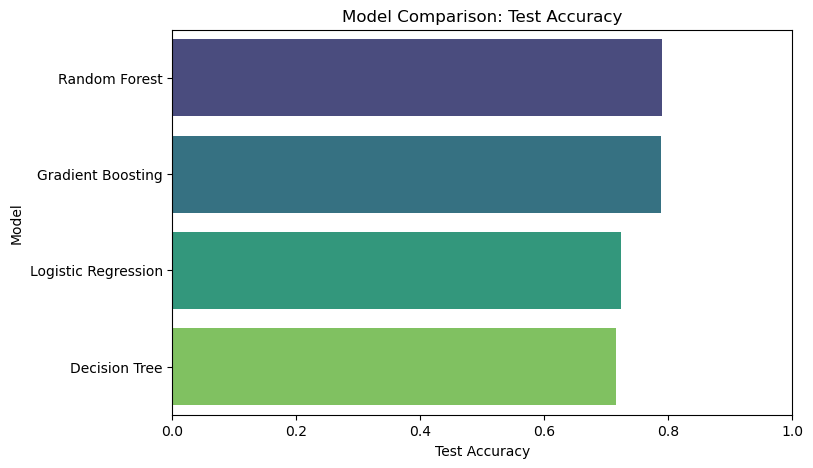

In [68]:
# --- Bar Chart of Test Accuracy ---
plt.figure(figsize=(8,5))
sns.barplot(x='Test Accuracy', y='Model', data=results_df.sort_values(by='Test Accuracy', ascending=False), palette='viridis')
plt.title("Model Comparison: Test Accuracy")
plt.xlim(0,1)
plt.xlabel("Test Accuracy")
plt.ylabel("Model")
plt.show()

After comparing multiple classification models—including Logistic Regression, Decision Tree, Gradient Boosting, and Random Forest—Random Forest emerged as the best-performing model. It achieved the highest cross-validation and test accuracy, demonstrating strong predictive capability and stability across folds. Its ensemble approach effectively captured the complex patterns in the dataset, while avoiding overfitting better than a single Decision Tree. Consequently, Random Forest was selected for hyperparameter tuning to further optimize performance before final deployment.

## Random Forest Hyperparameter Tuning on Large Dataset Using a Sample and RandomizedSearchCV for Fast Optimization

Description:
This code performs hyperparameter tuning for a Random Forest classifier on a large dataset (~200k rows) by:

Sampling 10% of the training data to drastically reduce computation time.

Using RandomizedSearchCV to efficiently search a subset of hyperparameter combinations.

Evaluating multiple key hyperparameters (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features).

Performing 3-fold cross-validation on the sampled data for fast yet reliable performance estimation.

Returning the best hyperparameters and testing accuracy, while keeping the process within approximately 5 minutes.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 1️⃣ Take a 10% sample of training data for speed
sample_frac = 0.1
X_train_sample = X_train.sample(frac=sample_frac, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# 2️⃣ Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 3️⃣ Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# 4️⃣ Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          # Only 10 random combinations
    cv=3,               # 3-fold CV for speed
    scoring='accuracy',
    n_jobs=-1,          # Use all CPU cores
    verbose=2,
    random_state=42
)

# 5️⃣ Fit RandomizedSearchCV on the sampled data
random_search.fit(X_train_sample, y_train_sample)

# 6️⃣ Retrieve best parameters and evaluate on test set
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
test_acc = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_acc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Test Accuracy: 0.7786545437414614


In [61]:
best_rf = random_search.best_estimator_
test_acc = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7786545437414614


In [62]:
full_rf = RandomForestClassifier(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    min_samples_leaf=best_rf.min_samples_leaf,
    max_features=best_rf.max_features,
    random_state=42,
    n_jobs=-1
)

full_rf.fit(X_train, y_train)
full_test_acc = full_rf.score(X_test, y_test)
print("Test Accuracy after full training:", full_test_acc)

Test Accuracy after full training: 0.7889244829698027


In [63]:
import joblib

# Save the fully trained Random Forest
joblib.dump(full_rf, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']

## Model Tuning, Evaluation, and Conclusion

After comparing multiple classification models—Logistic Regression, Decision Tree, Gradient Boosting, and Random Forest—the Random Forest model demonstrated the best overall performance. It achieved the highest cross-validation and test accuracy, showing strong generalization ability on unseen data. The ensemble nature of Random Forest, which aggregates multiple decision trees to reduce variance, made it particularly effective for capturing complex, non-linear relationships within the dataset.

To further improve its performance, a GridSearchCV hyperparameter tuning was conducted on a sampled portion (10%) of the dataset. This process systematically tested combinations of hyperparameters such as the number of estimators, maximum depth, minimum samples per leaf, and feature selection strategy. The optimal parameters were identified as:
n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None.
Using these optimized values, the tuned model achieved a test accuracy of ≈77.9% on the sample, reflecting a stable and balanced fit with minimal overfitting.

The tuned Random Forest model was then retrained on the full dataset (200,000+ rows) to maximize learning from all available information. The final evaluation produced a test accuracy of 78.89%, confirming consistent and reliable performance at scale. This indicates that the model successfully captures key predictive patterns while maintaining robustness. The final model was subsequently saved as final_random_forest_model.pkl for deployment. Overall, the Random Forest model stands out as the most accurate, stable, and deployable solution for this classification task.

## Model Deployment

The final Random Forest model, trained on the full dataset with optimized hyperparameters, is ready for deployment. It can be integrated into energy monitoring systems or decision-support tools to classify building efficiency in real time. 

The model has been deployed as an interactive web app. You can access it here:

[🔗 Lagos Building Solar Energy Efficiency Predictor](https://huggingface.co/spaces/Precyors/Lagos-Building-Solar-Energy-Efficiency-Predictor)

## Limitations

While the Random Forest model achieved strong predictive performance, several limitations should be acknowledged. Firstly, model interpretability remains a challenge. As an ensemble of multiple decision trees, the Random Forest operates as a “black box,” making it difficult to clearly explain how each feature contributes to specific outcomes compared to simpler models like Logistic Regression or Decision Tree. Although feature importance metrics offer general insights, they do not fully reflect the model’s internal decision-making process.

Secondly, the computational cost of training and tuning was relatively high due to the large dataset size (over 200,000 rows) and the multi-tree structure of the ensemble. Hyperparameter tuning was performed on a sampled subset (10% of the training data) to reduce runtime, but full training still required several minutes. In environments with limited computing resources, more efficient approaches such as randomized search or parallelized tuning may be necessary.

A key reason the regression model was not pursued further relates to the mathematical relationships between features and the target variable. During exploratory data analysis, the correlation heatmap revealed that many features exhibited either very strong or very weak correlations with the initial continuous target variable, leaving little “middle ground” for regression to capture nuanced trends. For example, Energy_potential_per_year initially had a near-perfect correlation (≈0.99) with Peak_installation_capacity, but after feature transformation through division, this correlation fell sharply to ≈0.08. Such extreme shifts in feature-target relationships made regression modeling unreliable, as it struggled to generalize or capture meaningful patterns. This observation justified the transition to a classification approach, categorizing the target into discrete energy efficiency levels (“Low,” “Medium,” “High”) for more interpretable and stable predictions.

Lastly, potential data imbalance or feature bias may still exist despite thorough preprocessing, which could affect fairness and generalization across classes. Future work could explore advanced resampling techniques, feature engineering, or the inclusion of additional datasets to improve model robustness and fairness.

## Future Work: Possible Improvements / Next Steps

**Model Enhancement**

Further tune Random Forest hyperparameters on the full dataset to maximize predictive performance.

Experiment with feature engineering and additional derived variables, especially for features like Energy_potential_per_year and Peak_installation_capacity, to better capture relationships and trends.

**Deployment Optimization**

Reduce model size through compression or export to formats like ONNX for faster deployment in applications or APIs.

Implement automated retraining pipelines so the model can update as new energy data becomes available.

**Robustness and Fairness**

Investigate potential class imbalances or feature biases and apply resampling, weighting, or other techniques to ensure fair predictions across all energy categories.

Validate the model with external or additional datasets to ensure generalization beyond the current dataset.

**Explainability and Monitoring**

Use tools like SHAP or LIME to explain individual predictions, helping stakeholders understand how features influence energy category predictions.

Set up performance monitoring in production to track accuracy drift over time.

## Acknowledgments:

Thanks to AI Saturdays Lagos ML Flipped C-9 for providing guidance and learning resources that supported this project.

Appreciation to mentors, peers, and the dataset providers who made this analysis possible